In [146]:
import warnings
warnings.filterwarnings("ignore")

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [148]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [149]:
path = 'C:/Users/Flora/인재개발원/취업랩 데이터자료(학생 전달)/2. 창대한프로젝트 마일리지 세부현황/'

In [150]:
df1 = pd.read_csv(path+'2018년 창대한프로젝트 마일리지 세부현황.csv')

In [151]:
df2 = pd.read_csv(path+'2019년 창대한프로젝트 마일리지 세부현황.csv')

In [152]:
df3 = pd.read_csv(path+'2020년 창대한프로젝트 마일리지 세부현황.csv')

In [153]:
df4 = pd.read_csv(path+'2021년 창대한프로젝트 마일리지 세부현황.csv')

In [154]:
df5 = pd.read_csv(path+'2021년 창대한프로젝트 마일리지 세부현황2.csv')

In [155]:
df1

,역량향상장학금 마일리지 합계표,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,○ 산정기간: 2018-2학기,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,연번,성명,학번,학년,은행명,계좌번호,필수,마일리지,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,경력개발시스템,계,상담/검사,교과목,비교과목,자격증,어학,봉사,공모전,교내활동,교외활동
3,1,NaN,20180242,1,NaN,NaN,O,76,10,30,32,NaN,NaN,NaN,4,NaN,NaN
4,2,NaN,20182159,1,NaN,NaN,O,129,0,30,99,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
df2

,2019년 국립대학육성사업 창대한 프로젝트 역량향상장학금 마일리지 합계표,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,○ 산정기간: 2019.3.1.(금)~2020.1.31.(금),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,연번,성명,학과,학번,학년,상태,은행명,계좌번호,필수,NaN,...,마일리지,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,역량진단,역량상담,...,계,2018 \n역량향상장학생,교과목,비교과목,자격증,어학,봉사,공모전,교내활동,교외활동
3,1,NaN,글로벌비즈니스학부,20181192,2,재학,NaN,NaN,O,O,...,85,NaN,10,30,NaN,5,40,NaN,NaN,NaN
4,2,NaN,정보통신공학과,20163001,4,재학,NaN,NaN,O,O,...,122,10,0,2,70,10,20,NaN,10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,80,NaN,기계공학부,20145142,4,복학,NaN,NaN,O,O,...,122,NaN,0,62,10,10,NaN,10,10,20
83,81,NaN,국어국문학과,20180041,2,재학,NaN,NaN,O,O,...,123,NaN,10,48,NaN,5,20,20,NaN,20
84,82,NaN,생명보건학부,20172205,3,재학,NaN,NaN,O,O,...,63,10,0,23,10,NaN,20,NaN,NaN,NaN
85,83,NaN,컴퓨터공학과,20183168,2,재학,NaN,NaN,O,O,...,37,10,0,7,NaN,NaN,20,NaN,NaN,NaN


In [157]:
df3

,2020년 대학혁신지원사업 SMART 마일리지 우수학생 장학금 지급 현황,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,연번,단과대학,학과,학번,성명,학년,학적,필수사항,NaN,NaN,NaN,최종 마일리지,선발여부,상별
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,커리어플랜,토익,진로설계서,SMART 진로취업상담,NaN,NaN,NaN
3,1,공과대학,산업시스템,20203231,NaN,1,재학,0,700,0,0,78,0,NaN
4,2,공과대학,컴퓨터공학과,20203043,NaN,1,재학,0,모의토익,0,0,18,x,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,117,경영대,회계학과,20161104,NaN,4,재학,0,865,0,0,27,x,NaN
120,118,NaN,문화테크노학과,20160254,NaN,4,재학,0,760,0,0,118,0,NaN
121,119,메카트로닉스대,전기전자제어공학,20155278,NaN,4,재학,0,735,0,0,163,0,NaN
122,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
df4

,2021년 대학혁신지원사업 SMART 마일리지 개인별 현황,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,연번,단과대학,학과,학번,성명,학년,마일리지 현황,NaN,NaN,NaN,NaN,NaN,NaN,NaN,최종 마일리지
2,NaN,NaN,NaN,NaN,NaN,NaN,교과,비교과,어학,자격증,공모전,봉사활동,교내활동,교외활동,NaN
3,1,인문대학,독어독문학과,20210072,NaN,1,NaN,28,NaN,10,NaN,20,NaN,NaN,58
4,2,인문대학,영어영문학과,20210039,NaN,1,10,28,NaN,NaN,NaN,NaN,NaN,NaN,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,118,메카트로닉스대학,기계공학부,20155074,NaN,4,NaN,28,NaN,25,NaN,NaN,NaN,40,93
121,119,경영대학,국제무역학과,20151296,NaN,4,NaN,33,15,30,30,NaN,NaN,100,208
122,120,메카트로닉스대학,전기전자제어공학부 전자공학전공,20165259,NaN,4,10,8,NaN,35,30,NaN,NaN,100,183
123,121,경영대학,글로벌비즈니스학부 경제학트랙,20171243,NaN,4,NaN,8,10,NaN,10,NaN,NaN,NaN,28


In [159]:
df5

,2021년 대학혁신지원사업 SMART 마일리지 우수학생 장학금 지급 현황,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,연번,단과대학,학과,학번,성명,학년,학적,필수사항,NaN,NaN,NaN,최종 마일리지,선발여부,상별
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,커리어플랜,토익,진로설계서,SMART 진로취업상담,NaN,NaN,NaN
3,1,인문대학,독어독문학과,20210072,NaN,1,재학,O,415,O,O,58,선발,NaN
4,2,인문대학,영어영문학과,20210039,NaN,1,재학,O,440,O,O,38,선발,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,118,메카트로닉스대학,기계공학부,20155074,NaN,4,재학,O,875,O,O,93,선발,NaN
121,119,경영대학,국제무역학과,20151296,NaN,4,재학,O,885,O,O,208,선발,NaN
122,120,메카트로닉스대학,전기전자제어공학부 전자공학전공,20165259,NaN,4,재학,O,905,O,O,183,선발,NaN
123,121,경영대학,글로벌비즈니스학부 경제학트랙,20171243,NaN,4,재학,O,755,O,O,28,선발,NaN


# 2018

In [160]:
df1.drop(df1.columns[[0]], axis=1, inplace=True)

In [161]:
df1

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,성명,학번,학년,은행명,계좌번호,필수,마일리지,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,경력개발시스템,계,상담/검사,교과목,비교과목,자격증,어학,봉사,공모전,교내활동,교외활동
3,NaN,20180242,1,NaN,NaN,O,76,10,30,32,NaN,NaN,NaN,4,NaN,NaN
4,NaN,20182159,1,NaN,NaN,O,129,0,30,99,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
df1 = df1.rename(columns=df1.iloc[1])

In [163]:
df1 = df1.drop(df1.index[0])

In [164]:
df1 = df1.drop(df1.index[0])

In [165]:
df1 = df1.drop(df1.columns[[0, 3, 4, 5]], axis = 1)

In [166]:
df1.reset_index(drop = True, inplace = True)

In [167]:
df1 = df1.drop(df1.index[0])

In [168]:
df1.columns = ['학번', '학년', '마일리지', '상담/검사', '교과목', '비교과목', '자격증', '어학', '봉사', '공모전', '교내활동', '교외활동']

In [169]:
df1 = df1.drop(df1.index[[-1, -2, -3, -4, -5]])
df1

,학번,학년,마일리지,상담/검사,교과목,비교과목,자격증,어학,봉사,공모전,교내활동,교외활동
1,20180242,1,76,10,30,32,NaN,NaN,NaN,4,NaN,NaN
2,20182159,1,129,0,30,99,NaN,NaN,NaN,NaN,NaN,NaN
3,20163001,3,56,3,30,21,NaN,NaN,2,NaN,NaN,NaN
4,20170576,2,12,0,NaN,0,NaN,NaN,2,10,NaN,NaN
5,20180701,1,101,3,30,62,NaN,NaN,NaN,NaN,6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
58,20180662,1,111,2,30,79,NaN,NaN,NaN,NaN,NaN,NaN
59,20170146,2,101,2,30,48,NaN,NaN,2,NaN,9,10
60,20172303,2,97,9,30,52,NaN,2,NaN,4,NaN,NaN
61,20185311,1,72,2,30,40,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
df1 = df1.fillna(0)
df1

,학번,학년,마일리지,상담/검사,교과목,비교과목,자격증,어학,봉사,공모전,교내활동,교외활동
1,20180242,1,76,10,30,32,0,0,0,4,0,0
2,20182159,1,129,0,30,99,0,0,0,0,0,0
3,20163001,3,56,3,30,21,0,0,2,0,0,0
4,20170576,2,12,0,0,0,0,0,2,10,0,0
5,20180701,1,101,3,30,62,0,0,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
58,20180662,1,111,2,30,79,0,0,0,0,0,0
59,20170146,2,101,2,30,48,0,0,2,0,9,10
60,20172303,2,97,9,30,52,0,2,0,4,0,0
61,20185311,1,72,2,30,40,0,0,0,0,0,0


In [171]:
df1['학번'] = df1['학번'].str[:8]

In [172]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 1 to 62
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   학번      62 non-null     object
 1   학년      62 non-null     object
 2   마일리지    62 non-null     object
 3   상담/검사   62 non-null     object
 4   교과목     62 non-null     object
 5   비교과목    62 non-null     object
 6   자격증     62 non-null     object
 7   어학      62 non-null     object
 8   봉사      62 non-null     object
 9   공모전     62 non-null     object
 10  교내활동    62 non-null     object
 11  교외활동    62 non-null     object
dtypes: object(12)
memory usage: 6.3+ KB


# 2019

In [173]:
df2

,2019년 국립대학육성사업 창대한 프로젝트 역량향상장학금 마일리지 합계표,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,○ 산정기간: 2019.3.1.(금)~2020.1.31.(금),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,연번,성명,학과,학번,학년,상태,은행명,계좌번호,필수,NaN,...,마일리지,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,역량진단,역량상담,...,계,2018 \n역량향상장학생,교과목,비교과목,자격증,어학,봉사,공모전,교내활동,교외활동
3,1,NaN,글로벌비즈니스학부,20181192,2,재학,NaN,NaN,O,O,...,85,NaN,10,30,NaN,5,40,NaN,NaN,NaN
4,2,NaN,정보통신공학과,20163001,4,재학,NaN,NaN,O,O,...,122,10,0,2,70,10,20,NaN,10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,80,NaN,기계공학부,20145142,4,복학,NaN,NaN,O,O,...,122,NaN,0,62,10,10,NaN,10,10,20
83,81,NaN,국어국문학과,20180041,2,재학,NaN,NaN,O,O,...,123,NaN,10,48,NaN,5,20,20,NaN,20
84,82,NaN,생명보건학부,20172205,3,재학,NaN,NaN,O,O,...,63,10,0,23,10,NaN,20,NaN,NaN,NaN
85,83,NaN,컴퓨터공학과,20183168,2,재학,NaN,NaN,O,O,...,37,10,0,7,NaN,NaN,20,NaN,NaN,NaN


In [174]:
df2.drop(df2.columns[[0]], axis=1, inplace=True)
df2 = df2.rename(columns=df2.iloc[1])
df2 = df2.drop(df2.index[0])
df2 = df2.drop(df2.index[0])


In [175]:
df2 = df2.drop(df2.columns[[0, 6, 4, 5, 7]], axis = 1)

In [176]:
df2.reset_index(drop = True, inplace = True)

In [177]:
df2 = df2.drop(df2.index[0])


In [178]:
df2.columns = ['학과','학번', '학년', '마일리지', '상담/검사', '교과목', '비교과목', '자격증', '어학', '봉사', '공모전', '교내활동', '교외활동', 'sd', '23d', 'asd', 'sdd']

In [179]:
df2 = df2.drop(df2.columns[[3, 4, 5, 6, 8]], axis = 1)

In [180]:
df2.columns = ['학과','학번', '학년', '마일리지 ', '교과목', '비교과목', '자격증', '어학', '봉사', '공모전', '교내활동', '교외활동']

In [181]:
df2 = df2.fillna(0)
df2

,학과,학번,학년,마일리지,교과목,비교과목,자격증,어학,봉사,공모전,교내활동,교외활동
1,글로벌비즈니스학부,20181192,2,85,10,30,0,5,40,0,0,0
2,정보통신공학과,20163001,4,122,0,2,70,10,20,0,10,0
3,신문방송학과,20180701,2,65,0,0,0,15,0,10,10,20
4,경영학과,20151001,4,166,10,41,45,10,40,0,0,20
5,전기전자제어공학부,20195164,1,46,0,16,0,0,30,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
80,기계공학부,20145142,4,122,0,62,10,10,0,10,10,20
81,국어국문학과,20180041,2,123,10,48,0,5,20,20,0,20
82,생명보건학부,20172205,3,63,0,23,10,0,20,0,0,0
83,컴퓨터공학과,20183168,2,37,0,7,0,0,20,0,0,0


In [182]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 1 to 84
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   학과      84 non-null     object
 1   학번      84 non-null     object
 2   학년      84 non-null     object
 3   마일리지    84 non-null     object
 4   교과목     84 non-null     object
 5   비교과목    84 non-null     object
 6   자격증     84 non-null     object
 7   어학      84 non-null     object
 8   봉사      84 non-null     object
 9   공모전     84 non-null     object
 10  교내활동    84 non-null     object
 11  교외활동    84 non-null     object
dtypes: object(12)
memory usage: 8.5+ KB


In [183]:
df_dup = pd.merge(df1['학번'], df2['학번'], how = 'inner', indicator = True)

In [184]:
df_dup

,학번,_merge
0,20163001,both
1,20180701,both
2,20151206,both
3,20145167,both
4,20171082,both
5,20170061,both
6,20172205,both
7,20183168,both


## 2018년도와 2019년도에 동시수상자 없음

# 2020

In [185]:
df3

,2020년 대학혁신지원사업 SMART 마일리지 우수학생 장학금 지급 현황,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,연번,단과대학,학과,학번,성명,학년,학적,필수사항,NaN,NaN,NaN,최종 마일리지,선발여부,상별
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,커리어플랜,토익,진로설계서,SMART 진로취업상담,NaN,NaN,NaN
3,1,공과대학,산업시스템,20203231,NaN,1,재학,0,700,0,0,78,0,NaN
4,2,공과대학,컴퓨터공학과,20203043,NaN,1,재학,0,모의토익,0,0,18,x,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,117,경영대,회계학과,20161104,NaN,4,재학,0,865,0,0,27,x,NaN
120,118,NaN,문화테크노학과,20160254,NaN,4,재학,0,760,0,0,118,0,NaN
121,119,메카트로닉스대,전기전자제어공학,20155278,NaN,4,재학,0,735,0,0,163,0,NaN
122,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
df3.drop(df3.columns[[0]], axis=1, inplace=True)
df3 = df3.rename(columns=df3.iloc[1])
df3 = df3.drop(df3.index[0])
df3 = df3.drop(df3.index[0])
df3


,단과대학,학과,학번,성명,학년,학적,필수사항,NaN,NaN,NaN,최종 마일리지,선발여부,상별
2,NaN,NaN,NaN,NaN,NaN,NaN,커리어플랜,토익,진로설계서,SMART 진로취업상담,NaN,NaN,NaN
3,공과대학,산업시스템,20203231,NaN,1,재학,0,700,0,0,78,0,NaN
4,공과대학,컴퓨터공학과,20203043,NaN,1,재학,0,모의토익,0,0,18,x,NaN
5,자연대,생물화학융합,20202115,NaN,1,재학,0,모의토익,0,0,18,x,NaN
6,공과대학,토목환경화공융합공학부,20203116,NaN,1,재학,0,415,0,0,192,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,경영대,회계학과,20161104,NaN,4,재학,0,865,0,0,27,x,NaN
120,NaN,문화테크노학과,20160254,NaN,4,재학,0,760,0,0,118,0,NaN
121,메카트로닉스대,전기전자제어공학,20155278,NaN,4,재학,0,735,0,0,163,0,NaN
122,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
df3.columns = ['학과','학번', '학년', '마일리지', '상담/검사', '교과목', '비교과목', '자격증', '어학', '봉사', '공모전', '교내활동', '교외활동']

In [188]:
df3 = df3.drop(df3.columns[[0, 3, 6, 5, 8, 9, 11, 12]], axis = 1)

In [189]:
df3.reset_index(drop = True, inplace = True)
df3 = df3.drop(df3.index[0])

In [190]:
df3.columns = ['학과', '학번', '학년', '토익', '마일리지']
df3 = df3.drop(df3.index[[-1, -2]])
df3 = df3.fillna(0)
df3

,학과,학번,학년,토익,마일리지
1,산업시스템,20203231,1,700,78
2,컴퓨터공학과,20203043,1,모의토익,18
3,생물화학융합,20202115,1,모의토익,18
4,토목환경화공융합공학부,20203116,1,415,192
5,유아교육학과,20200276,1,모의토익,38
...,...,...,...,...,...
115,국제관계학과,20160611,4,850,95
116,통계학과,20162099,4,790,67
117,회계학과,20161104,4,865,27
118,문화테크노학과,20160254,4,760,118


In [191]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 1 to 119
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   학과      119 non-null    object
 1   학번      119 non-null    object
 2   학년      119 non-null    object
 3   토익      119 non-null    object
 4   마일리지    119 non-null    object
dtypes: object(5)
memory usage: 5.6+ KB


In [192]:
df3['학번'] = df3['학번'].str[:8]

In [193]:
df1['학번'].unique()

array(['20180242', '20182159', '20163001', '20170576', '20180701',
       '20141185', '20181197', '20150038', '20150582', '20151206',
       '20145151', '20133101', '20151210', '20181213', '20181214',
       '20181016', '20182052', '20162172', '20182176', '20180708',
       '20185025', '20140228', '20134386', '20123449', '20140011',
       '20123451', '20134259', '20123460', '20143129', '20151246',
       '20180021', '20150603', '20145167', '20171202', '20150017',
       '20151036', '20133119', '20180225', '20180583', '20134319',
       '20180716', '20171082', '20170163', '20180626', '20150735',
       '20133205', '20165241', '20182065', '20180229', '20170061',
       '20183262', '20151057', '20140738', '20183276', '20130786',
       '20172205', '20180157', '20180662', '20170146', '20172303',
       '20185311', '20183168'], dtype=object)

In [194]:
df_dup1 = pd.merge(df1['학번'], df3['학번'], how = 'inner', indicator = True)
df_dup1

,학번,_merge
0,20180701,both
1,20171082,both
2,20180626,both
3,20172205,both
4,20183168,both


In [195]:
df1[df1['학번'] == '20172205']

,학번,학년,마일리지,상담/검사,교과목,비교과목,자격증,어학,봉사,공모전,교내활동,교외활동
56,20172205,2,76,76,30,22,0,0,2,2,0,0


In [196]:
df3[df3['학번'] == '20172205']

,학과,학번,학년,토익,마일리지
105,생명보건학부,20172205,4,710,43


In [197]:
df_dup2 = pd.merge(df2['학번'], df3['학번'], how = 'inner', indicator = True)
df_dup2

,학번,_merge
0,20180701,both
1,20183003,both
2,20165190,both
3,20180617,both
4,20165042,both
5,20155055,both
6,20171082,both
7,20155066,both
8,20155067,both
9,20180632,both


In [198]:
cnt = 0
for i in range(5):
    for j in range(17):
        if df_dup['학번'][i] == df_dup2['학번'][j]:
            print(df_dup['학번'][i])
            cnt +=1
cnt

20180701
20171082


2

In [199]:
anylist = df_dup2.학번.tolist()
anylist

['20180701',
 '20183003',
 '20165190',
 '20180617',
 '20165042',
 '20155055',
 '20171082',
 '20155066',
 '20155067',
 '20180632',
 '20172141',
 '20155080',
 '20161104',
 '20155084',
 '20160254',
 '20180041',
 '20172205',
 '20183168']

In [200]:
df2['학번'].unique()

array(['20181192', '20163001', '20180701', '20151001', '20195164',
       '20151004', '20190556', '20183003', '20151206', '20180046',
       '20195183', '20155012', '20191214', '20192080', '20150007',
       '20190591', '20161077', '20190190', '20155025', '20162175',
       '20180609', '20190012', '20163014', '20140598', '20165190',
       '20195224', '20193159', '20153055', '20191242', '20145118',
       '20190564', '20190018', '20143015', '20150726', '20151083',
       '20151084', '20161089', '20180617', '20190021', '20190140',
       '20145167', '20190569', '20151089', '20165042', '20193181',
       '20161246', '20145247', '20153025', '20133118', '20161258',
       '20155055', '20130566', '20190570', '20171082', '20155228',
       '20182204', '20150266', '20171084', '20190621', '20190029',
       '20145068', '20195082', '20192153', '20155066', '20155067',
       '20191297', '20134217', '20170061', '20191298', '20180632',
       '20164068', '20172141', '20155080', '20190153', '201451

In [201]:
for i in range(len(anylist)):
    print(df2[df2['학번'] == anylist[i]])

       학과        학번 학년 마일리지  교과목 비교과목 자격증   어학 봉사  공모전 교내활동 교외활동
3  신문방송학과  20180701  2   65   0    0    0  15   0  10   10   20 
        학과        학번 학년 마일리지  교과목 비교과목 자격증 어학   봉사 공모전 교내활동 교외활동
8  정보통신공학과  20183003  2   71   0   31    0  0  20    0    0  20 
           학과        학번 학년 마일리지  교과목 비교과목  자격증   어학   봉사 공모전 교내활동 교외활동
25  전기전자제어공학부  20165190  3   71   0   21   20   10   20    0    0    0
        학과        학번 학년 마일리지   교과목 비교과목 자격증 어학   봉사 공모전 교내활동 교외활동
38  국제관계학과  20180617  2   95   10   35    0  0  30    0  20     0
       학과        학번 학년 마일리지   교과목 비교과목 자격증 어학 봉사 공모전 교내활동 교외활동
44  기계공학부  20165042  2   23   10   13    0  0  0   0    0    0
       학과        학번 학년 마일리지   교과목 비교과목  자격증 어학   봉사 공모전 교내활동 교외활동
51  기계공학부  20155055  3   90   10   30   10   0  30    0  10     0
      학과        학번 학년 마일리지  교과목 비교과목 자격증   어학 봉사  공모전 교내활동 교외활동
54  회계학과  20171082  3  182   0   82    0  10   0  20   20   40 
       학과        학번 학년 마일리지   교과목 비교과목  자격증  어학 봉사  공모전 교내활동 교외활동
64  기계공학부  201

In [202]:
for i in range(len(anylist)):
    print(df3[df3['학번'] == anylist[i]])

        학과        학번 학년   토익 마일리지
65  신문방송학과  20180701  3  885  153
      학과        학번 학년   토익 마일리지
43  정보통신  20183003  3  615   72
        학과        학번 학년   토익 마일리지
92  전기전자제어  20165190  4  810   11
        학과        학번 학년   토익 마일리지
71  국제관계학과  20180617  3  700  178
       학과        학번 학년   토익 마일리지
72  기계공학부  20165042  3  630  118
       학과        학번 학년   토익 마일리지
95  기계공학부  20155055  4  760  100
       학과        학번 학년   토익 마일리지
112  회계학과  20171082  4  760  167
       학과        학번 학년   토익 마일리지
99  기계공학부  20155066  4  710  160
        학과        학번 학년   토익 마일리지
100  기계공학부  20155067  4  800  105
        학과        학번 학년   토익 마일리지
59  국제관계학과  20180632  3  690  149
            학과        학번 학년   토익 마일리지
101  생물학화학융합학부  20172141  4  760  201
        학과        학번 학년   토익 마일리지
102  기계공학부  20155080  4  765   75
       학과        학번 학년   토익 마일리지
117  회계학과  20161104  4  865   27
        학과        학번 학년   토익 마일리지
103  기계공학부  20155084  4  740   90
          학과        학번 학년   토익 마일리지
118  문화테크노학과  2016

# 2021

In [203]:
df4.drop(df4.columns[[0]], axis=1, inplace=True)
df4 = df4.rename(columns=df4.iloc[1])
df4 = df4.drop(df4.index[0])
df4 = df4.drop(df4.index[0])
df4

,단과대학,학과,학번,성명,학년,마일리지 현황,NaN,NaN,NaN,NaN,NaN,NaN,NaN,최종 마일리지
2,NaN,NaN,NaN,NaN,NaN,교과,비교과,어학,자격증,공모전,봉사활동,교내활동,교외활동,NaN
3,인문대학,독어독문학과,20210072,NaN,1,NaN,28,NaN,10,NaN,20,NaN,NaN,58
4,인문대학,영어영문학과,20210039,NaN,1,10,28,NaN,NaN,NaN,NaN,NaN,NaN,38
5,미래융합대학,문화테크노학과,20214505,NaN,1,NaN,28,NaN,NaN,NaN,NaN,NaN,NaN,28
6,메카트로닉스대학,전기전자제어공학부 전자공학전공,20215173,NaN,1,10,47,NaN,NaN,NaN,NaN,NaN,NaN,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,메카트로닉스대학,기계공학부,20155074,NaN,4,NaN,28,NaN,25,NaN,NaN,NaN,40,93
121,경영대학,국제무역학과,20151296,NaN,4,NaN,33,15,30,30,NaN,NaN,100,208
122,메카트로닉스대학,전기전자제어공학부 전자공학전공,20165259,NaN,4,10,8,NaN,35,30,NaN,NaN,100,183
123,경영대학,글로벌비즈니스학부 경제학트랙,20171243,NaN,4,NaN,8,10,NaN,10,NaN,NaN,NaN,28


In [204]:
df4.columns = ['학번', '학년', '마일리지', '상담/검사', '교과목', '비교과목', '자격증', '어학', '봉사', '공모전', '교내활동', '교외활동', 'asdf', 'asd']
df4

,학번,학년,마일리지,상담/검사,교과목,비교과목,자격증,어학,봉사,공모전,교내활동,교외활동,asdf,asd
2,NaN,NaN,NaN,NaN,NaN,교과,비교과,어학,자격증,공모전,봉사활동,교내활동,교외활동,NaN
3,인문대학,독어독문학과,20210072,NaN,1,NaN,28,NaN,10,NaN,20,NaN,NaN,58
4,인문대학,영어영문학과,20210039,NaN,1,10,28,NaN,NaN,NaN,NaN,NaN,NaN,38
5,미래융합대학,문화테크노학과,20214505,NaN,1,NaN,28,NaN,NaN,NaN,NaN,NaN,NaN,28
6,메카트로닉스대학,전기전자제어공학부 전자공학전공,20215173,NaN,1,10,47,NaN,NaN,NaN,NaN,NaN,NaN,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,메카트로닉스대학,기계공학부,20155074,NaN,4,NaN,28,NaN,25,NaN,NaN,NaN,40,93
121,경영대학,국제무역학과,20151296,NaN,4,NaN,33,15,30,30,NaN,NaN,100,208
122,메카트로닉스대학,전기전자제어공학부 전자공학전공,20165259,NaN,4,10,8,NaN,35,30,NaN,NaN,100,183
123,경영대학,글로벌비즈니스학부 경제학트랙,20171243,NaN,4,NaN,8,10,NaN,10,NaN,NaN,NaN,28


In [205]:
df4 = df4.drop(df4.columns[[0, 3]], axis = 1)
df4.reset_index(drop = True, inplace = True)
df4 = df4.drop(df4.index[0])
df4.columns = ['학과', '학번', '학년', '교과목', '비교과목', '어학', '자격증', '공모전', '봉사', '교내활동', '교외활동', '마일리지']
df4 = df4.fillna(0)
df4

,학과,학번,학년,교과목,비교과목,어학,자격증,공모전,봉사,교내활동,교외활동,마일리지
1,독어독문학과,20210072,1,0,28,0,10,0,20,0,0,58
2,영어영문학과,20210039,1,10,28,0,0,0,0,0,0,38
3,문화테크노학과,20214505,1,0,28,0,0,0,0,0,0,28
4,전기전자제어공학부 전자공학전공,20215173,1,10,47,0,0,0,0,0,0,57
5,가족복지학과,20210785,1,0,35,0,0,0,40,0,0,75
...,...,...,...,...,...,...,...,...,...,...,...,...
118,기계공학부,20155074,4,0,28,0,25,0,0,0,40,93
119,국제무역학과,20151296,4,0,33,15,30,30,0,0,100,208
120,전기전자제어공학부 전자공학전공,20165259,4,10,8,0,35,30,0,0,100,183
121,글로벌비즈니스학부 경제학트랙,20171243,4,0,8,10,0,10,0,0,0,28


# 2021 토익 ver

In [206]:
df5.drop(df5.columns[[0]], axis=1, inplace=True)
df5 = df5.rename(columns=df5.iloc[1])
df5 = df5.drop(df5.index[0])
df5 = df5.drop(df5.index[0])
df5

,단과대학,학과,학번,성명,학년,학적,필수사항,NaN,NaN,NaN,최종 마일리지,선발여부,상별
2,NaN,NaN,NaN,NaN,NaN,NaN,커리어플랜,토익,진로설계서,SMART 진로취업상담,NaN,NaN,NaN
3,인문대학,독어독문학과,20210072,NaN,1,재학,O,415,O,O,58,선발,NaN
4,인문대학,영어영문학과,20210039,NaN,1,재학,O,440,O,O,38,선발,NaN
5,미래융합대학,문화테크노학과,20214505,NaN,1,재학,O,620,O,X,28,미선발,NaN
6,메카트로닉스대학,전기전자제어공학부 전자공학전공,20215173,NaN,1,재학,O,595,O,O,57,선발,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,메카트로닉스대학,기계공학부,20155074,NaN,4,재학,O,875,O,O,93,선발,NaN
121,경영대학,국제무역학과,20151296,NaN,4,재학,O,885,O,O,208,선발,NaN
122,메카트로닉스대학,전기전자제어공학부 전자공학전공,20165259,NaN,4,재학,O,905,O,O,183,선발,NaN
123,경영대학,글로벌비즈니스학부 경제학트랙,20171243,NaN,4,재학,O,755,O,O,28,선발,NaN


In [207]:
df5.columns = ['학년', '마일리지', '상담/검사', '교과목', '비교과목', '자격증', '어학', '봉사', '공모전', '교내활동', '교외활동', 'asdf', 'asd']
df5

,학년,마일리지,상담/검사,교과목,비교과목,자격증,어학,봉사,공모전,교내활동,교외활동,asdf,asd
2,NaN,NaN,NaN,NaN,NaN,NaN,커리어플랜,토익,진로설계서,SMART 진로취업상담,NaN,NaN,NaN
3,인문대학,독어독문학과,20210072,NaN,1,재학,O,415,O,O,58,선발,NaN
4,인문대학,영어영문학과,20210039,NaN,1,재학,O,440,O,O,38,선발,NaN
5,미래융합대학,문화테크노학과,20214505,NaN,1,재학,O,620,O,X,28,미선발,NaN
6,메카트로닉스대학,전기전자제어공학부 전자공학전공,20215173,NaN,1,재학,O,595,O,O,57,선발,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,메카트로닉스대학,기계공학부,20155074,NaN,4,재학,O,875,O,O,93,선발,NaN
121,경영대학,국제무역학과,20151296,NaN,4,재학,O,885,O,O,208,선발,NaN
122,메카트로닉스대학,전기전자제어공학부 전자공학전공,20165259,NaN,4,재학,O,905,O,O,183,선발,NaN
123,경영대학,글로벌비즈니스학부 경제학트랙,20171243,NaN,4,재학,O,755,O,O,28,선발,NaN


In [208]:
df5 = df5.drop(df5.columns[[0, 3, 5, 6, 8, 9, 11, 12]], axis = 1)
df5.reset_index(drop = True, inplace = True)
df5 = df5.drop(df5.index[0])
df5.columns = ['학과', '학번', '학년', '토익', '마일리지']
df5 = df5.fillna(0)
df5

,학과,학번,학년,토익,마일리지
1,독어독문학과,20210072,1,415,58
2,영어영문학과,20210039,1,440,38
3,문화테크노학과,20214505,1,620,28
4,전기전자제어공학부 전자공학전공,20215173,1,595,57
5,가족복지학과,20210785,1,190,75
...,...,...,...,...,...
118,기계공학부,20155074,4,875,93
119,국제무역학과,20151296,4,885,208
120,전기전자제어공학부 전자공학전공,20165259,4,905,183
121,글로벌비즈니스학부 경제학트랙,20171243,4,755,28


In [209]:
df5['학번'] = df5['학번'].str[:8]

In [210]:
df4['학번'].unique()

array(['20210072', '20210039 ', '20214505 ', '20215173 ', '20210785',
       '20210043 ', '20210629', '20212114', '20213008 ', '20213327',
       '20211098', '20210514 ', '20212079', '20211140', '20213178',
       '20211186', '20210049 ', '20213097 ', '20212083', '20210053 ',
       '20210127 ', '20211105', '20215152 ', '20213102', '20210017 ',
       '20212179', '20210216 ', '20210133 ', '20210134 ', '20213295',
       '20211112 ', '20213121', '20211115 ', '20214524 ', '20210024',
       '20213302 ', '20210574', '20214527 ', '20212093 ', '20210712',
       '20212065 ', '20210195', '20212248 ', '20210651', '20181001',
       '20203231', '20202172', '20201182', '20203108 ', '20205108',
       '20200276', '20185199', '20203146', '20202255 ', '20205051',
       '20201231 ', '20203177', '20203181 ', '20203029 ', '20201137',
       '20201056', '20183256', '20175065', '20185265 ', '20205274 ',
       '20202225 ', '20202020', '20162230', '20191076 ', '20171101 ',
       '20192080 ', '20195020

In [211]:
df4['학번'] = df4['학번'].str[:8]

In [212]:
df_dup3 = pd.merge(df1['학번'], df4['학번'], how = 'inner', indicator = True)
df_dup3

,학번,_merge
0,20165241,both


In [213]:
df1[df1['학번'] == '20165241']

,학번,학년,마일리지,상담/검사,교과목,비교과목,자격증,어학,봉사,공모전,교내활동,교외활동
47,20165241,3,19,3,0,16,0,0,0,0,0,0


In [214]:
df4[df4['학번'] == '20165241']

,학과,학번,학년,교과목,비교과목,어학,자격증,공모전,봉사,교내활동,교외활동,마일리지
108,전기전자제어공학부,20165241,4,0,27,5,20,0,0,0,0,52


In [215]:
df_dup4 = pd.merge(df2['학번'], df4['학번'], how = 'inner', indicator = True)
df_dup4

,학번,_merge
0,20192080,both


In [216]:
df2[df2['학번'] == '20192080']

,학과,학번,학년,마일리지,교과목,비교과목,자격증,어학,봉사,공모전,교내활동,교외활동
14,통계학과,20192080,1,25,10,15,0,0,0,0,0,0


In [217]:
df4[df4['학번'] == '20192080']

,학과,학번,학년,교과목,비교과목,어학,자격증,공모전,봉사,교내활동,교외활동,마일리지
71,통계학과,20192080,3,0,23,5,0,0,30,0,0,58


In [218]:
df_dup5 = pd.merge(df3['학번'], df4['학번'], how = 'inner', indicator = True)
df_dup5

,학번,_merge
0,20203231,both
1,20200276,both
2,20202255,both
3,20201137,both
4,20202020,both
5,20203146,both
6,20191018,both
7,20175055,both
8,20175056,both
9,20195075,both


In [219]:
anylist5 = df_dup5.학번.tolist()
anylist5

['20203231',
 '20200276',
 '20202255',
 '20201137',
 '20202020',
 '20203146',
 '20191018',
 '20175055',
 '20175056',
 '20195075',
 '20191051',
 '20175241',
 '20171101',
 '20195020',
 '20191047',
 '20195297',
 '20165003',
 '20165156',
 '20185210',
 '20170245',
 '20185268',
 '20165244',
 '20184029',
 '20155072',
 '20155074',
 '20165238',
 '20162217',
 '20165071',
 '20165259',
 '20165066']

In [220]:
newdf3 = pd.DataFrame()
for i in range(len(anylist5)):
    newdf3 = newdf3.append(df3[df3['학번'] == anylist5[i]])
newdf3

,학과,학번,학년,토익,마일리지
1,산업시스템,20203231,1,700,78
5,유아교육학과,20200276,1,모의토익,38
6,간호학과,20202255,1,모의토익,46
10,세무학과,20201137,1,585,108
12,물리학과,20202020,1,740,26
19,토목환경화공융합공학부,20203146,1,665,42
29,경영학과,20191018,2,615,66
30,기계공학부,20175055,2,575,164
31,기계공학부,20175056,2,555,76
32,기계공학부,20195075,2,580,48


In [221]:
newdf3['마일리지']

1      78
5      38
6      46
10    108
12     26
19     42
29     66
30    164
31     76
32     48
33     58
34     18
35     59
36     80
38     68
39     76
42     93
44     81
50    125
53    133
54     57
55    159
56     88
57    131
58    215
75    108
76    108
78    187
80     98
98     71
Name: 마일리지, dtype: object

In [222]:
newdf3 = newdf3.reset_index()

In [223]:
newdf3

,index,학과,학번,학년,토익,마일리지
0,1,산업시스템,20203231,1,700,78
1,5,유아교육학과,20200276,1,모의토익,38
2,6,간호학과,20202255,1,모의토익,46
3,10,세무학과,20201137,1,585,108
4,12,물리학과,20202020,1,740,26
5,19,토목환경화공융합공학부,20203146,1,665,42
6,29,경영학과,20191018,2,615,66
7,30,기계공학부,20175055,2,575,164
8,31,기계공학부,20175056,2,555,76
9,32,기계공학부,20195075,2,580,48


In [224]:
newdf3['토익'][1, 2, 22] = 0    

In [225]:
newdf3['토익'][3]

'585'

In [226]:
newdf3['마일리지'] = [int (i) for i in newdf3['마일리지']]

In [227]:
newdf3['토익'] = [int (i) for i in newdf3['토익']]

In [228]:
newdf3

,index,학과,학번,학년,토익,마일리지
0,1,산업시스템,20203231,1,700,78
1,5,유아교육학과,20200276,1,0,38
2,6,간호학과,20202255,1,0,46
3,10,세무학과,20201137,1,585,108
4,12,물리학과,20202020,1,740,26
5,19,토목환경화공융합공학부,20203146,1,665,42
6,29,경영학과,20191018,2,615,66
7,30,기계공학부,20175055,2,575,164
8,31,기계공학부,20175056,2,555,76
9,32,기계공학부,20195075,2,580,48


In [229]:
newdf4 = pd.DataFrame()
for i in range(len(anylist5)):
    newdf4 = newdf4.append(df4[df4['학번'] == anylist5[i]])

In [230]:
newdf4['마일리지'] = [int (i) for i in newdf4['마일리지']]

In [231]:
newdf4 = newdf4.reset_index()

In [232]:
newdf4

,index,학과,학번,학년,교과목,비교과목,어학,자격증,공모전,봉사,교내활동,교외활동,마일리지
0,46,산업시스템공학과,20203231,2,0,18,5,0,0,40,0,0,63
1,51,유아교육과,20200276,2,0,48,0,0,0,0,0,0,48
2,54,간호학과,20202255,2,0,18,0,0,0,20,0,0,38
3,60,세무학과,20201137,2,0,38,5,10,0,10,20,20,103
4,67,전기전자제어공학부 전자공학전공,20202020,2,0,38,10,0,0,0,10,20,78
5,53,토목환경화공융합공학부,20203146,2,0,48,0,0,0,0,0,0,48
6,75,경영학과,20191018,3,0,50,5,20,0,10,0,20,105
7,82,기계공학과,20175055,3,0,55,0,0,90,0,50,120,315
8,83,기계공학과,20175056,3,0,43,0,15,80,0,60,120,318
9,87,기계공학부,20195075,3,20,34,0,20,0,0,10,0,84


In [233]:
newdf4[newdf4['학번'] == '20175056']

,index,학과,학번,학년,교과목,비교과목,어학,자격증,공모전,봉사,교내활동,교외활동,마일리지
8,83,기계공학과,20175056,3,0,43,0,15,80,0,60,120,318


In [234]:
newdf3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   30 non-null     int64 
 1   학과      30 non-null     object
 2   학번      30 non-null     object
 3   학년      30 non-null     object
 4   토익      30 non-null     int64 
 5   마일리지    30 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 1.5+ KB


In [235]:
newdf5 = pd.DataFrame()
for i in range(len(anylist5)):
    newdf5 = newdf5.append(df5[df5['학번'] == anylist5[i]])
newdf5['마일리지'] = [int (i) for i in newdf5['마일리지']]
newdf5 = newdf5.reset_index()
newdf5

,index,학과,학번,학년,토익,마일리지
0,46,산업시스템공학과,20203231,2,675,63
1,51,유아교육과,20200276,2,555,48
2,54,간호학과,20202255,2,585,38
3,60,세무학과,20201137,2,720,103
4,67,전기전자제어공학부 전자공학전공,20202020,2,755,78
5,53,토목환경화공융합공학부,20203146,2,665,48
6,75,경영학과,20191018,3,710,105
7,82,기계공학과,20175055,3,625,315
8,83,기계공학과,20175056,3,645,318
9,87,기계공학부,20195075,3,695,84


In [236]:
for i in range(29):
    if newdf5['토익'][i] == '-':
        newdf5['토익'][i] = 0
newdf5['토익'] = [int (i) for i in newdf5['토익']]

In [237]:
newdf5

,index,학과,학번,학년,토익,마일리지
0,46,산업시스템공학과,20203231,2,675,63
1,51,유아교육과,20200276,2,555,48
2,54,간호학과,20202255,2,585,38
3,60,세무학과,20201137,2,720,103
4,67,전기전자제어공학부 전자공학전공,20202020,2,755,78
5,53,토목환경화공융합공학부,20203146,2,665,48
6,75,경영학과,20191018,3,710,105
7,82,기계공학과,20175055,3,625,315
8,83,기계공학과,20175056,3,645,318
9,87,기계공학부,20195075,3,695,84


In [238]:
newdf4['마일리지'][0]

63

In [239]:
newdf3['마일리지'][0]

78

In [240]:
a = []
for i in range(len(anylist5)):
    if newdf4['마일리지'][i] > newdf3['마일리지'][i]:
        a.append(i)
a
len(a)

19

In [241]:
a

[1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 17, 20, 22, 25, 26, 28, 29]

In [242]:
mmean = pd.DataFrame()
for i in range(len(anylist5)):
    if newdf4['마일리지'][i] > newdf3['마일리지'][i]:
        mmean = mmean.append([newdf4['마일리지'][i] - newdf3['마일리지'][i]])
mmean

,0
0,10
0,52
0,6
0,39
0,151
0,242
0,36
0,92
0,135
0,124


In [243]:
mmean.reset_index(drop = True)

,0
0,10
1,52
2,6
3,39
4,151
5,242
6,36
7,92
8,135
9,124


In [244]:
mean_df = mmean[0].mean()
print(mean_df)

67.57894736842105


In [245]:
mmean = mmean.reset_index(drop = True)

In [246]:
mmeandrop5 = mmean.drop([mmean.index[5]])
mmeandrop5[0].mean()

57.888888888888886

In [247]:
b = []
for i in range(len(anylist5)):
    if newdf5['토익'][i] > newdf3['토익'][i]:
        b.append(i)
b
len(b)

19

In [248]:
mmean2 = pd.DataFrame()
for i in range(len(anylist5)):
    if newdf5['토익'][i] > newdf3['토익'][i]:
        mmean2 = mmean2.append([newdf5['토익'][i] - newdf3['토익'][i]])
mmean2
mmean2.reset_index(drop = True)

,0
0,555
1,585
2,135
3,15
4,95
5,50
6,90
7,115
8,125
9,40


In [249]:
mean_df2 = mmean2[0].mean()
print(mean_df2)

148.42105263157896


In [250]:
mmean2 = mmean2.reset_index(drop = True)
mmeandrop12 = mmean2.drop([mmean2.index[0], mmean2.index[1]])
mmeandrop12.mean()

0    98.823529
dtype: float64

In [251]:
b

[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 15, 18, 19, 20, 25, 26, 27, 29]

## 전과자 찾기

In [299]:
df3

,학과,학번,학년,토익,마일리지
1,산업시스템,20203231,1,700,78
2,컴퓨터공학과,20203043,1,모의토익,18
3,생물화학융합,20202115,1,모의토익,18
4,토목환경화공융합공학부,20203116,1,415,192
5,유아교육학과,20200276,1,모의토익,38
...,...,...,...,...,...
115,국제관계학과,20160611,4,850,95
116,통계학과,20162099,4,790,67
117,회계학과,20161104,4,865,27
118,문화테크노학과,20160254,4,760,118


In [319]:
majorlist1 =newdf3.학과.str[0:2]

In [320]:
majorlist1

0     산업
1     유아
2     간호
3     세무
4     물리
5     토목
6     경영
7     기계
8     기계
9     기계
10    경영
11    전기
12    세무
13    기계
14    경영
15    전기
16    기계
17    전기
18    전기
19    문화
20    전기
21    전기
22    음악
23    기계
24    기계
25    전기
26    생명
27    기계
28    전기
29    기계
Name: 학과, dtype: object

In [321]:
majorlist2 =newdf5.학과.str[0:2]

In [322]:
majorlist2

0     산업
1     유아
2     간호
3     세무
4     전기
5     토목
6     경영
7     기계
8     기계
9     기계
10    경영
11    전기
12    세무
13    기계
14    경영
15    전기
16    기계
17    전기
18    전기
19    문화
20    전기
21    전기
22    음악
23    기계
24    기계
25    전기
26    생명
27    기계
28    전기
29    기계
Name: 학과, dtype: object

In [323]:
cnt = 0
for i in range(29):
    if majorlist1[i] != majorlist2[i]:
        print(i)
        cnt +=1
cnt

4


1

In [288]:
newdf3.iloc[4:5]

,index,학과,학번,학년,토익,마일리지
4,12,물리학과,20202020,1,740,26


In [290]:
newdf3.iloc[22:23]

,index,학과,학번,학년,토익,마일리지
22,56,음악학,20184029,3,0,88


In [289]:
newdf5.iloc[4:5]

,index,학과,학번,학년,토익,마일리지
4,67,전기전자제어공학부 전자공학전공,20202020,2,755,78


In [292]:
newdf5.iloc[22:23]

,index,학과,학번,학년,토익,마일리지
22,113,음악과,20184029,4,0,168


In [258]:
# for i in range(len(anylist1)):
#     print(df4[df4['학번'] == anylist1[i]])

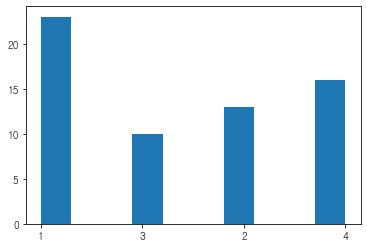

In [259]:
fig = plt.figure(figsize = (6, 4))
axis1 = fig.add_subplot(1, 1,1)

axis1.hist(df1['학년'])
plt.show()

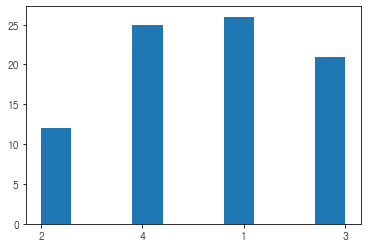

In [260]:
fig = plt.figure(figsize = (6, 4))
axis1 = fig.add_subplot(1, 1,1)

axis1.hist(df2['학년'])
plt.show()

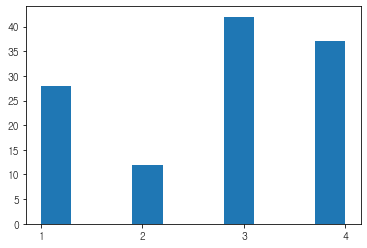

In [261]:
fig = plt.figure(figsize = (6, 4))
axis1 = fig.add_subplot(1, 1,1)

axis1.hist(df3['학년'])
plt.show()

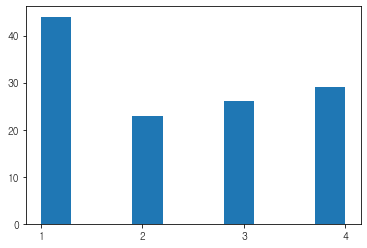

In [262]:
fig = plt.figure(figsize = (6, 4))
axis1 = fig.add_subplot(1, 1,1)

axis1.hist(df4['학년'])
plt.show()

<AxesSubplot:>

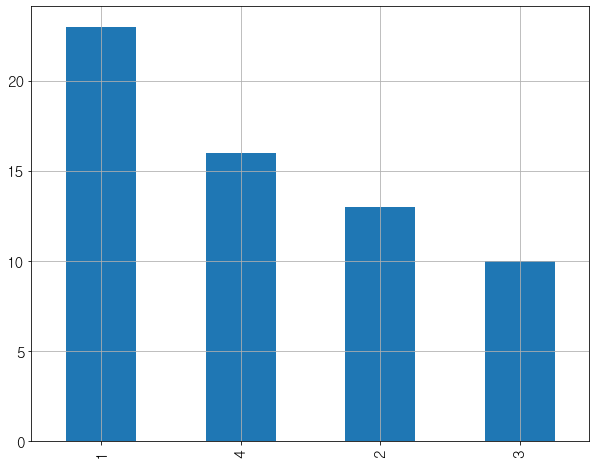

In [263]:
CountStatus = pd.value_counts(df1['학년'].values, sort=True)
CountStatus.plot.bar()
CountStatus.plot.bar(grid=True, figsize=(10,8), fontsize=15)

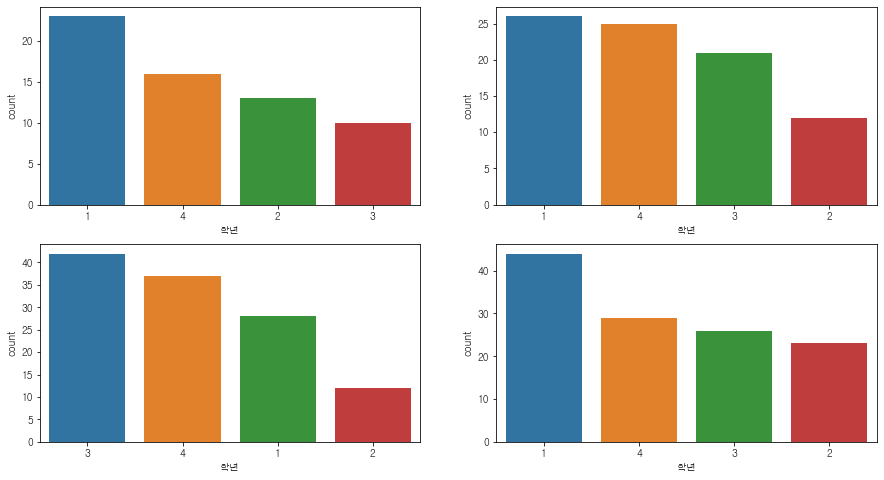

In [264]:
import seaborn as sns
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
sns.countplot(ax = axes[0,0], x="학년", data=df1, order = df1['학년'].value_counts().index)
sns.countplot(ax = axes[0,1],x="학년", data=df2, order = df2['학년'].value_counts().index)
sns.countplot(ax = axes[1,0],x="학년", data=df3, order = df3['학년'].value_counts().index)
sns.countplot(ax = axes[1,1],x="학년", data=df4, order = df4['학년'].value_counts().index)
plt.show()

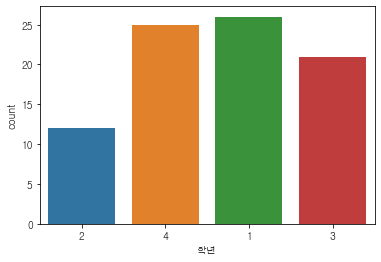

In [266]:
sns.countplot(x="학년", data=df2, )
plt.show()

In [267]:
# df_dup6 = pd.merge(df1['학번'], df2['학번'], df2['학번'], how = 'inner', indicator = True)
# df_dup6

In [268]:
cnt = 0
for i in range(5):
    for j in range(17):
        if df_dup['학번'][i] == df_dup2['학번'][j]:
            print(df_dup['학번'][i])
            print(i)
            cnt +=1
cnt

20180701
1
20171082
4


2

In [269]:
df1[df1['학번'] == '20180701']

,학번,학년,마일리지,상담/검사,교과목,비교과목,자격증,어학,봉사,공모전,교내활동,교외활동
5,20180701,1,101,3,30,62,0,0,0,0,6,0


In [270]:
df2[df2['학번'] =='20180701']

,학과,학번,학년,마일리지,교과목,비교과목,자격증,어학,봉사,공모전,교내활동,교외활동
3,신문방송학과,20180701,2,65,0,0,0,15,0,10,10,20


In [271]:
df3[df3['학번'] == '20180701']

,학과,학번,학년,토익,마일리지
65,신문방송학과,20180701,3,885,153


In [272]:
df1[df1['학번'] == '20171082']

,학번,학년,마일리지,상담/검사,교과목,비교과목,자격증,어학,봉사,공모전,교내활동,교외활동
42,20171082,2,97,7,0,90,0,0,0,0,0,0


In [273]:
df2[df2['학번'] == '20171082']

,학과,학번,학년,마일리지,교과목,비교과목,자격증,어학,봉사,공모전,교내활동,교외활동
54,회계학과,20171082,3,182,0,82,0,10,0,20,20,40


In [274]:
df3[df3['학번'] == '20171082']

,학과,학번,학년,토익,마일리지
112,회계학과,20171082,4,760,167


In [275]:
df4[df4['학번'] == '20180701']

,학과,학번,학년,교과목,비교과목,어학,자격증,공모전,봉사,교내활동,교외활동,마일리지


In [276]:
cnt = 0
for i in range(5):
    for j in range(1):
        if df_dup['학번'][i] == df_dup3['학번'][j]:
            print(df_dup['학번'][i])
            cnt +=1
cnt

0

In [277]:
cnt = 0
for i in range(5):
    for j in range(1):
        if df_dup['학번'][i] == df_dup4['학번'][j]:
            print(df_dup['학번'][i])
            cnt +=1
cnt

0

In [278]:
cnt = 0
for i in range(5):
    for j in range(29):
        if df_dup['학번'][i] == df_dup5['학번'][j]:
            print(df_dup['학번'][i])
            cnt +=1
cnt

0

In [279]:
cnt = 0
for i in range(17):
    for j in range(29):
        if df_dup2['학번'][i] == df_dup5['학번'][j]:
            print(df_dup2['학번'][i])
            cnt +=1
cnt

0